## Workforce 2nd Problem


In [414]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression

## Import

In [415]:
filename = "project.xlsx"
data = pd.read_excel(filename)

In [416]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HierarchyLevel
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,2
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,7
2,37,Yes,Travel_Rarely,1373,Dummy,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,5
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,4
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17,3,3,5,2,0,3,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,9,5,3,7,7,1,7,5
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6,0,3,6,2,0,3,9
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17,3,2,9,6,0,8,2


## Cleaning

In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

<AxesSubplot:>

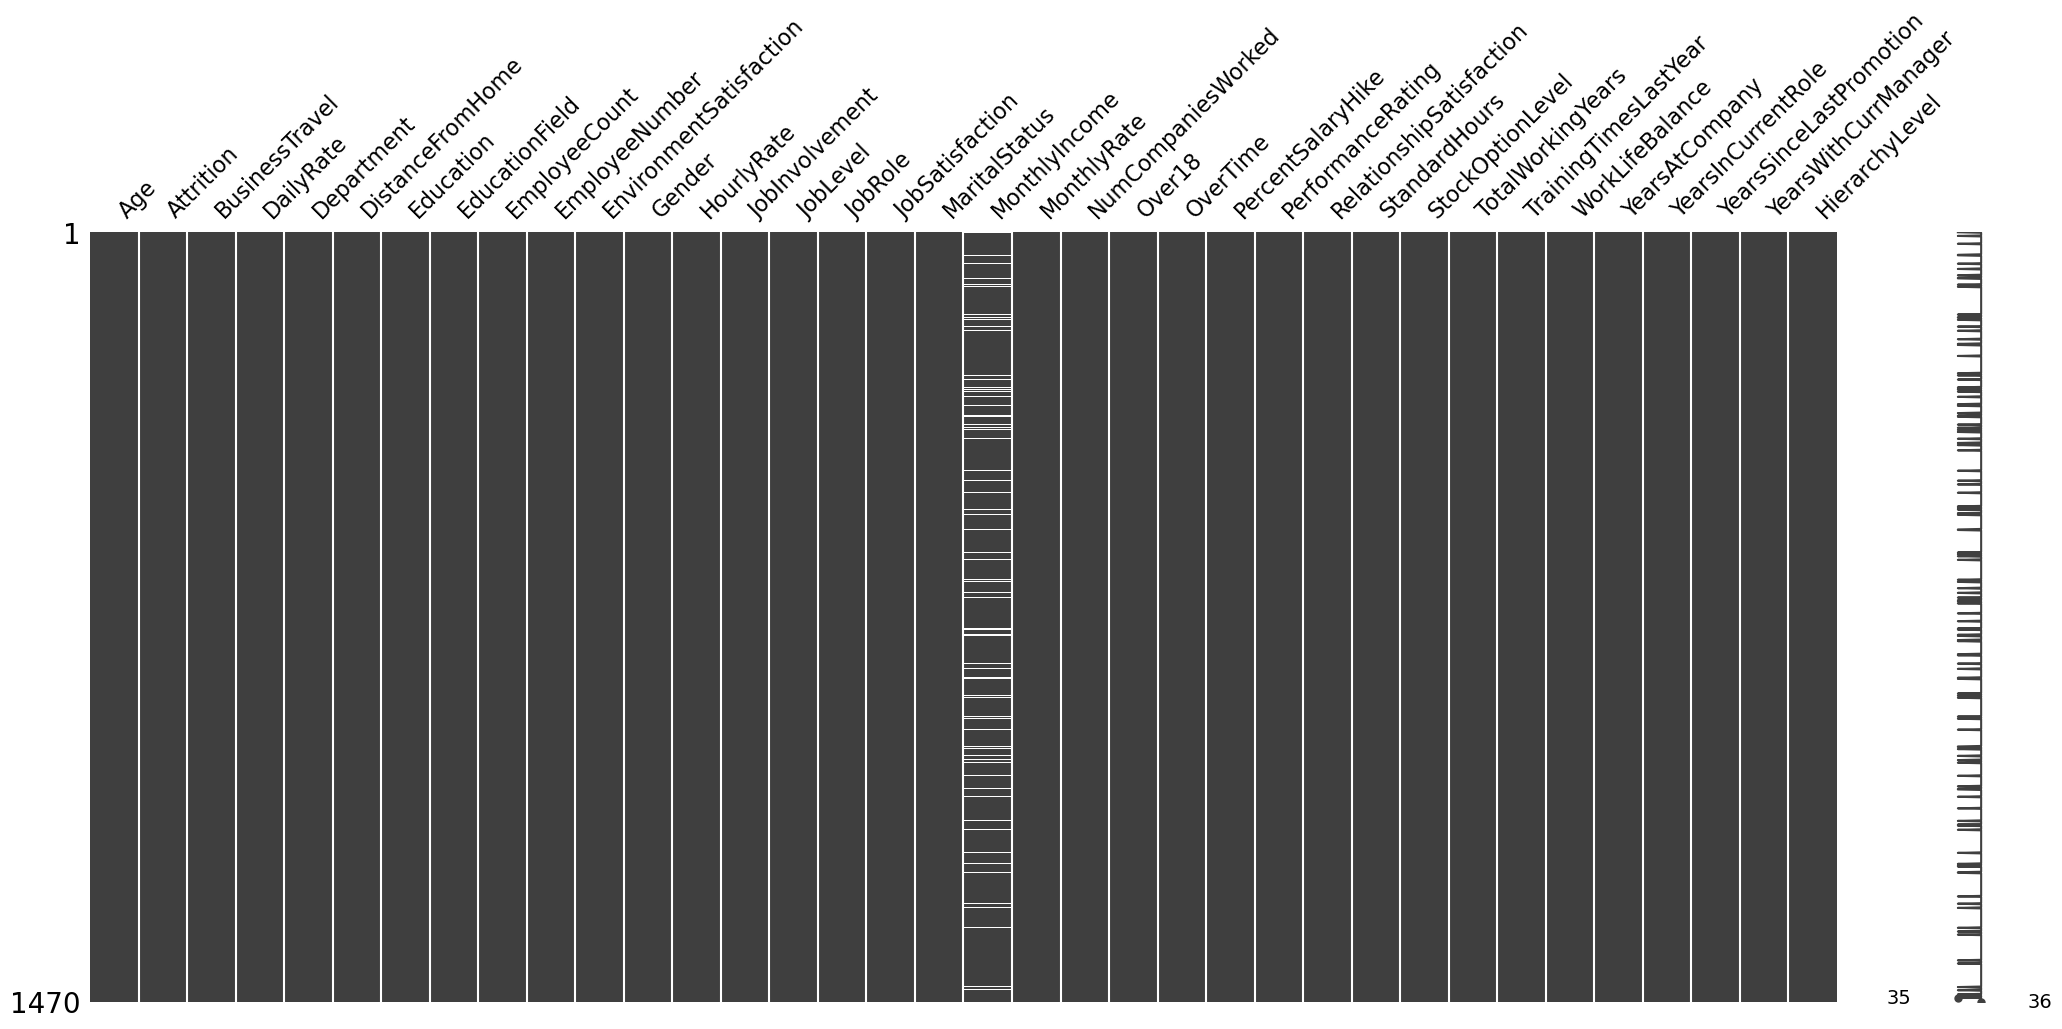

In [418]:
msno.matrix(data)

In [419]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     4
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1247
MonthlyRate                 1427
NumCompaniesWorked            11
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [302]:
data = data.drop(columns="EmployeeCount")
data = data.drop(columns="StandardHours")
data = data.drop(columns="Over18")
data = data.drop(columns="EmployeeNumber")


# data = data.dropna(subset=['MonthlyIncome'])

In [303]:
mask = data["YearsAtCompany"] >= data["Age"]
data.loc[mask, "YearsAtCompany"] = data.loc[mask, "TotalWorkingYears"] - data.loc[mask, "YearsInCurrentRole"]




Fixing the `YearsAtCompany` 


.


check if the total working years is valid

In [304]:
count = data.loc[data["TotalWorkingYears"] < data["YearsAtCompany"]].shape[0]   # check if the total working years is valid

count



0

In [362]:
data["NumCompaniesWorked"] = data["NumCompaniesWorked"].apply(lambda x: 0 if x == -1 else x)

# fix the NumCompaniesWorked

In [306]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HierarchyLevel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1349.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6507.107487,...,2.712245,0.793878,11.279592,2.799320,2.761224,7.112245,4.229252,2.187755,4.123129,4.967347
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4735.329185,...,1.081209,0.852077,7.780782,1.289271,0.706476,6.397885,3.623137,3.222430,3.568136,2.610451
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2909.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4898.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,5.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8346.000000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.750000,7.000000,3.000000,7.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,9.000000


In [307]:
print("Before: ",len(data))
data.drop_duplicates(inplace = True)   # duplicate removal
print("After: ",len(data))

Before:  1470
After:  1470


In [363]:
data_dumb = pd.get_dummies(data, drop_first=True) # create dummies

In [309]:
data_dumb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DailyRate                          1470 non-null   int64  
 2   DistanceFromHome                   1470 non-null   int64  
 3   Education                          1470 non-null   int64  
 4   EnvironmentSatisfaction            1470 non-null   int64  
 5   HourlyRate                         1470 non-null   int64  
 6   JobInvolvement                     1470 non-null   int64  
 7   JobLevel                           1470 non-null   int64  
 8   JobSatisfaction                    1470 non-null   int64  
 9   MonthlyIncome                      1349 non-null   float64
 10  MonthlyRate                        1470 non-null   int64  
 11  NumCompaniesWorked                 1470 non-null   int64

### Add constant 


In [364]:
data_dumb = sm.add_constant(data_dumb, has_constant='add')
data_dumb

,const,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.0,41,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,1.0,49,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,1.0,37,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,1.0,33,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,1.0,27,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,36,884,23,2,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
1466,1.0,39,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1467,1.0,27,155,4,3,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,1.0,49,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


In [365]:
# data export for R use
# data_dumb.to_excel("cleaned_data.xlsx",index=False)

###  Interactive Correlation matrix for Attrition 

In [367]:

"""
Data Split

"""
# data = data.dropna(subset=['MonthlyIncome'])
X = data_dumb.drop("Attrition_Yes", axis=1)
y = data_dumb["Attrition_Yes"]

In [313]:
import plotly.express as px

corr = data_dumb.corr()
# convert the Seaborn plot to an interactive plotly plot
plotly_fig = px.imshow(corr)
plotly_fig.update_layout(
    title='Correlation Plot',
    width=1000,
    height=1000,
    xaxis={
        'title': 'Variables',
        'tickmode': 'array',
        'tickvals': list(range(len(corr.columns))),
        'ticktext': corr.columns,
        'tickangle': -45
    },
    yaxis={
        'title': 'Variables',
        'tickmode': 'array',
        'tickvals': list(range(len(corr.columns))),
        'ticktext': corr.columns,
        'tickangle': 0
    }
)
plotly_fig.show()

### Data exploration using the corr matrix above 

In [315]:



data_dumb['MonthlyIncome'].groupby(data_dumb['JobLevel']).describe()

,count,mean,std,min,25%,50%,75%,max
JobLevel,,,,,,,,
1,500.0,2792.118000,743.973253,1009.0,2306.5,2660.5,3201.25,4968.0
2,491.0,5487.977597,1419.996318,2042.0,4530.0,5326.0,6272.00,9998.0
3,193.0,9816.373057,1818.451329,5210.0,8380.0,9980.0,10845.00,13757.0
4,100.0,15466.840000,1832.626264,11103.0,13752.0,16094.0,17016.75,17924.0
5,65.0,19172.123077,516.436059,18041.0,18844.0,19202.0,19566.00,19999.0


In [316]:
data_dumb['YearsAtCompany'].describe()

count    1470.000000
mean        7.112245
std         6.397885
min         0.000000
25%         3.000000
50%         5.000000
75%         9.750000
max        40.000000
Name: YearsAtCompany, dtype: float64

In [253]:
data_dumb['DistanceFromHome'].describe()

count    1349.000000
mean        9.123795
std         8.035268
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

### Split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Forward Stepwise Selection SM library

In [101]:
full_model = sm.OLS(y_train, X_train)
fitted_full_model = full_model.fit()

In [105]:
feature_columns = list(X_train.columns)

In [109]:
def forward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    results=[]
    for p in remaining_predictors:
        results.append(processSubset(X, y, feature_set=predictors+[p]+['const']))
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    return best_model

In [110]:
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    
    predictors = []
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before: # 변수를 추가하면서 AIC가 증가하면 stop
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']

    return(Fmodels['model'][len(Fmodels['model'])])

In [378]:
Forward_best_model = forward_model(X=X_train, y= y_train)

Selected predictors: ['OverTime_Yes', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001B2A2A8F280>
Selected predictors: ['OverTime_Yes', 'JobLevel', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001B2A2AA70D0>
Selected predictors: ['OverTime_Yes', 'JobLevel', 'MaritalStatus_Single', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001B2A2A7CD90>
Selected predictors: ['OverTime_Yes', 'JobLevel', 'MaritalStatus_Single', 'EnvironmentSatisfaction', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001B2A2A6A0D0>
Selected predictors: ['OverTime_Yes', 'JobLevel', 'MaritalStatus_Single', 'EnvironmentSatisfaction', 'JobRole_Sales Representative', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001B2A2A7C0A0>
Selected predictors: ['OverTime_Yes', 'JobLevel', 'MaritalStatus_Single', 

In [379]:
print(Forward_best_model.aic, fitted_full_model.aic)

709.1757346560016 651.0972710371366


In [380]:
print(fitted_full_model.params.shape)
print(Forward_best_model.params.shape)

(47,)
(24,)


In [381]:
small_list_5 = ['OverTime_Yes', 'JobLevel',
                'MaritalStatus_Single', 'EnvironmentSatisfaction',
                'JobSatisfaction', 'JobInvolvement',
                'const']

In [382]:
X_chosen_train = X_train[small_list_5]
X_chosen_train

,OverTime_Yes,JobLevel,MaritalStatus_Single,EnvironmentSatisfaction,JobSatisfaction,JobInvolvement,const
1,0,2,0,3,2,2,1.0
2,1,1,1,4,3,2,1.0
3,1,1,0,4,3,3,1.0
4,0,1,0,1,2,3,1.0
5,0,1,1,4,4,3,1.0
...,...,...,...,...,...,...,...
1465,0,2,0,3,4,4,1.0
1466,0,3,0,4,1,2,1.0
1467,1,2,0,2,2,4,1.0
1468,0,2,0,4,2,2,1.0


In [383]:
shorter_model = sm.OLS(y_train, X_chosen_train)
shorter_model_res = shorter_model.fit()


In [384]:
print(shorter_model_res.summary())

                            OLS Regression Results                            
Dep. Variable:          Attrition_Yes   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     38.02
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.98e-42
Time:                        23:37:43   Log-Likelihood:                -398.70
No. Observations:                1215   AIC:                             811.4
Df Residuals:                    1208   BIC:                             847.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
OverTime_Yes              

# BELOW KFOLD WAS NOT USED - REFER TO R 

#### Function for the ease of use - KFold

In [401]:
data_dumb = data_dumb.dropna(subset=['MonthlyIncome'])
X = data_dumb.drop("Attrition_Yes", axis=1)
y = data_dumb["Attrition_Yes"]

In [402]:
stepwise_chosen = ['OverTime_Yes', 'JobLevel',
                'MaritalStatus_Single', 'EnvironmentSatisfaction',
                'JobRole_Sales Representative', 'JobInvolvement',
                'const']
X_train_stepwise_pick = X[stepwise_chosen]

In [403]:
corr_chosen = ['OverTime_Yes', 'JobLevel',
                'MaritalStatus_Single', 'TotalWorkingYears',
                'JobRole_Sales Representative', 'YearsInCurrentRole',
                'const']
X_train_corr_pick = X[corr_chosen]

In [404]:
def K_Fold_OLS(input_x, n_splits=10, random_state=42):
        # Define your number of splits and random state for reproducibility

    # Create your KFold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    average_MSE = []
    # Loop through each fold
    for train_index, test_index in kf.split(input_x):
        # Split your data into train and test sets for this fold
        X_train, X_test = input_x.iloc[train_index], input_x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit your model on the training data for this fold
        model = sm.OLS(y_train, X_train).fit()

        # Predict on the test data for this fold
        y_pred = model.predict(X_test)

        # Evaluate the performance of the model on the test data for this fold
        mse = np.mean((y_test - y_pred) ** 2)
        r_squared = model.rsquared
        average_MSE.append(mse)
        # Print the performance metrics for this fold
#         print('MSE:', mse)
#         print('R-squared:', r_squared)
    return(sum(average_MSE)/len(average_MSE))

In [405]:
print("Full_data MSE: ", K_Fold_OLS(X))
print("Stepwise MSE: ", K_Fold_OLS(X_train_stepwise_pick))
print("Correlation MSE: ", K_Fold_OLS(X_train_corr_pick))

Full_data MSE:  0.1066209921925009
Stepwise MSE:  0.11417306693049736
Correlation MSE:  0.1173168897590727


#### The models above are not good, since y-pred can be outside of the actual ranges from 0 to 1. Some are even negative. 

 LOGIT models shouldn't use MSE

In [406]:
def K_Fold_Logit(input_x, n_splits=10, random_state=42):
        # Define your number of splits and random state for reproducibility

    # Create your KFold cross-validator
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    average_MSE = []
    # Loop through each fold
    for train_index, test_index in kf.split(input_x):
        # Split your data into train and test sets for this fold
        X_train, X_test = input_x.iloc[train_index], input_x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit your model on the training data for this fold
        model = sm.Logit(y_train, X_train).fit(disp=0)

        # Predict on the test data for this fold
        y_pred = model.predict(X_test)

        # Evaluate the performance of the model on the test data for this fold
        mse = np.mean((y_test - y_pred) ** 2)

        average_MSE.append(mse)

    return(sum(average_MSE)/len(average_MSE))

In [407]:
print("Full_data MSE: ", K_Fold_Logit(X))
print("Stepwise MSE: ", K_Fold_Logit(X_train_stepwise_pick))
print("Correlation MSE: ", K_Fold_Logit(X_train_corr_pick))

Full_data MSE:  0.09345535690737658
Stepwise MSE:  0.10944871443800741
Correlation MSE:  0.1125293069358988


C:\Users\jegor\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning:

overflow encountered in exp

C:\Users\jegor\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning:

divide by zero encountered in log



In [408]:
# dummy_columns = ['PerformanceRating', 'BusinessTravel_Travel_Frequently',
#                  'BusinessTravel_Travel_Rarely', 
#                  'Department_Human Resources',
#                  'Department_Research & Development', 
#                  'Department_Sales',
#                  'EducationField_Life Sciences', 
#                  'EducationField_Marketing',
#                  'EducationField_Medical', 
#                  'EducationField_Other',
#                  'EducationField_Technical Degree',
#                  'Gender_Male',
#                  'JobRole_Human Resources',
#                  'JobRole_Laboratory Technician',
#                  'JobRole_Manager',
#                  'JobRole_Manufacturing Director',
#                  'JobRole_Research Director',
#                  'JobRole_Research Scientist',
#                  'JobRole_Sales Executive',
#                  'JobRole_Sales Representative',
#                  'MaritalStatus_Married',
#                  'MaritalStatus_Single']

# # Normalize only the non-dummy variables
# scaler = StandardScaler()
# non_dummy_columns = [col for col in X_train.columns if col not in dummy_columns]
# X_train[non_dummy_columns] = scaler.fit_transform(X_train[non_dummy_columns])

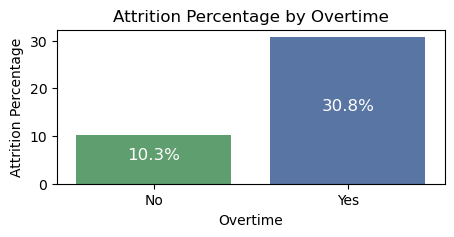

In [409]:
attrition_pct = data_dumb.groupby('OverTime_Yes')['Attrition_Yes'].mean() * 100
plt.figure(figsize=(5, 2))
# Create a bar chart with two bars and swapped colors
ax = sns.barplot(x=attrition_pct.index, y=attrition_pct.values, palette=['#4C72B0', '#55A868'][::-1])


# Set the axis labels and title
ax.set_xlabel('Overtime')
ax.set_ylabel('Attrition Percentage')
ax.set_title('Attrition Percentage by Overtime')

# Add percentage labels to the bars inside the columns
for idx, val in enumerate(attrition_pct.values):
    ax.text(idx, val/2, '{:.1f}%'.format(val), ha='center', color='white', fontsize=12)

# Set the x-tick labels to 'No' and 'Yes'
ax.set_xticklabels(['No', 'Yes'])

plt.show()



## Partial dependency 


In [410]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider,IntSlider, Button, HBox, VBox, fixed
import ipywidgets as widgets

In [411]:
col_names = list(X_train.columns)

In [412]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)


def plot_partial_dependency_interactive(model, X, feature_names):
    @interact(feature_idx=IntSlider(min=1, 
                                    max=46,
#                                     max=len(feature_names)-1, 
                                    step=1, value=0, description='Feature'))
    
    
    def plot_single_feature(feature_idx):
        plt.figure(figsize=(10, 8))
        feature_name = feature_names[feature_idx]
        plot_partial_dependence(model, X, [feature_idx], line_kw={'color': 'red'}, feature_names=feature_names)
        plt.title(f"Partial dependence of {feature_name}")
        plt.show()

plot_partial_dependency_interactive(rf, X_train, X_train.columns)

interactive(children=(IntSlider(value=1, description='Feature', max=46, min=1), Output()), _dom_classes=('widg…

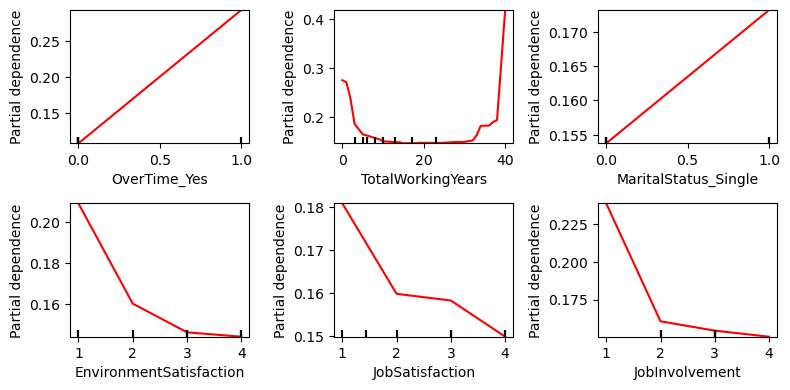

In [413]:

features_to_plot = ['OverTime_Yes', 'TotalWorkingYears', 'MaritalStatus_Single', 'EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement']

def plot_partial_dependency_interactive(model, X, feature_names):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
    axs = axs.ravel()

    for i, feature in enumerate(features_to_plot):
        feature_idx = feature_names.get_loc(feature)
        plot_partial_dependence(model, X, [feature_idx], line_kw={'color': 'red'}, ax=axs[i])
#         axs[i].set_title(f"Partial dependence of {feature}")
    
    fig.tight_layout()
    plt.show()

plot_partial_dependency_interactive(rf, X_train, X_train.columns)